In [ ]:
import numpy as np
import math

#list important:
# k_create,
# one_hot_sim, k_exp_horiz

#Set Parameters
n = 4
k_o = 0.49
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s
p = 4
q = 2

#K matrix without exceptions
    # return_k = false -> returns offset diagonal  
def tridiag(n):
    arr_len = n-1
    diag_len = arr_len-1
    B = np.diag(np.ones((diag_len)), k=1) + np.diag(np.ones((diag_len)), k=-1)
    return B        

def k_create(n, alpha_prime):
    arr_len = n-1

    A = np.identity(arr_len)
    D = A
    B = alpha_prime*tridiag(n)
    C = B
    E = np.block([[A,B],[B,A]])
    return E

#creates a vector for exceptions (only works for exception cases!)
def e_i(n, i):
    len_arr = n-1
    array_pos = i-1     #(-1 to normalize), p and q refer to normal indices (from 1 to len_arr)
    arr = np.zeros(len_arr)
    if i > 0 and i < n: #if outside, k_o excluded from similarity matrix e.g. AE exception for n=5
        arr[array_pos] = 1 
    return arr

#sides matrix in k_exp representing exceptions
def k_exp_horiz(n, p, q, alpha_prime):
    A = e_i(n, p) + e_i(n, q-1)
    B = e_i(n, q) + e_i(n, p-1)
    C = e_i(n, p-1) + e_i(n, q)
    D = e_i(n, q-1) + e_i(n, p)
    E = alpha_prime * np.block([[A,C],[B,D]])
    return E

def k_create_excep(n, p, q, alpha_prime):
    K = k_create(n, alpha_prime)
    E_1 = k_exp_horiz(n, p, q, alpha_prime)
    E_2 = E_1.transpose()
    E_3 = np.identity(2) #2 since there's only 2 columns for exceptions
    
    W = np.concatenate([K, E_1])
    X = np.concatenate([E_2, E_3])
    Z = np.concatenate([W, X], 1)
    return Z

K = k_create(n,alpha_prime)
print('K', '\n', K)
K_exp = k_create_excep(n, p, q, alpha_prime)
print('K_exp', '\n',K_exp)


K 
 [[1.   0.   0.   0.   0.49 0.  ]
 [0.   1.   0.   0.49 0.   0.49]
 [0.   0.   1.   0.   0.49 0.  ]
 [0.   0.49 0.   1.   0.   0.  ]
 [0.49 0.   0.49 0.   1.   0.  ]
 [0.   0.49 0.   0.   0.   1.  ]]
K_exp 
 [[1.   0.   0.   0.   0.49 0.   0.49 0.  ]
 [0.   1.   0.   0.49 0.   0.49 0.   0.49]
 [0.   0.   1.   0.   0.49 0.   0.   0.49]
 [0.   0.49 0.   1.   0.   0.   0.   0.49]
 [0.49 0.   0.49 0.   1.   0.   0.49 0.  ]
 [0.   0.49 0.   0.   0.   1.   0.49 0.  ]
 [0.49 0.   0.   0.   0.49 0.49 1.   0.  ]
 [0.   0.49 0.49 0.49 0.   0.   0.   1.  ]]


In [2]:
np.linalg.det(K)

0.017304553433831738

In [3]:
np.linalg.det(K_exp)

0.00031643838460330704

In [4]:
def y_create(n):
    A = np.ones(n-1)
    B = A * -1
    D = np.concatenate([A, B])
    return D

def y_create_exp(n):
    A = np.ones(n-1)
    B = A * -1
    C = np.array([1, -1])
    D = np.concatenate([A, B, C])
    return D

def a_create(n, alpha_prime):
    K = k_create(n, alpha_prime)
    y = y_create(n)
    a = np.linalg.solve(K, y)
    return a

def a_exp_create(n, p, q, alpha_prime):
    K_exp = k_create_excep(n, p, q, alpha_prime)
    y_exp = y_create_exp(n)
    a_exp = np.linalg.solve(K_exp, y_exp)
    return a_exp

y = y_create(n)
a = a_create(n, alpha_prime)
y_exp = y_create_exp(n)
a_exp = a_exp_create(n, p, q, alpha_prime)

print('verify:')
print('y', y)
print('K@a', K@a, '\n')

print('verify:')
print('y_exp', y_exp)
print('K_exp@a_exp', K_exp@a_exp, '\n')

verify:
y [ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]
K@a [ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.] 

verify:
y_exp [ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1.]
K_exp@a_exp [ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1.] 



In [5]:
n = 7
k_o = 0.49
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s
p = 4
q = 2

def task_exp(n, p, q, alpha_prime):
    K_exp = k_create_excep(n, p, q, alpha_prime)
    a_exp = a_exp_create(n,p,q,alpha_prime)
    return K_exp, a_exp

K_exp, a_exp = task_exp(n,p,q,alpha_prime)
print(K_exp @ a_exp)
verif = True

for i in range(0, len(y_exp)):
    print(y_exp[i], (K_exp @ a_exp)[i])
    if math.isclose(y_exp[i], (K_exp @ a_exp)[i], abs_tol = 1e-04):
        continue
    else: 
        verif = False
print('K is ', verif)


[ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1.]
1.0 1.0
1.0 1.0
1.0 0.9999999999999929
1.0 1.0000000000000027
1.0 1.0
1.0 0.9999999999999996
-1.0 -0.9999999999999982
-1.0 -1.0
-1.0 -0.9999999999999978
-1.0 -1.0
-1.0 -0.9999999999999991
-1.0 -1.0
1.0 1.0000000000000036
-1.0 -1.0000000000000036
K is  True


In [6]:
y_exp

array([ 1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
       -1.])

In [7]:
print(a_exp)
print(K_exp@a_exp)

[  3.09175364  51.0167512   52.23538258   6.79738785   6.34388741
   4.10850483  -3.09175364 -51.0167512  -52.23538258  -6.79738785
  -6.34388741  -4.10850483  46.74786622 -46.74786622]
[ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1.]


In [8]:
# Create a dictionary with keys generated using the index and values from the array
def create_bc(n,p,q,alpha_prime):
    a_exp = a_exp_create(n,p,q,alpha_prime)
    num_coeff = n-1
    b = {i: a_exp[i-1] for i in range(1, num_coeff + 1)}
    b_bar = {i: a_exp[i-1+n-1] for i in range(1, num_coeff + 1)}
    c = {1: a_exp[2 * num_coeff]}
    c_bar = {1: a_exp[2 * num_coeff + 1]}
    return b, b_bar, c, c_bar

b, b_bar, c, c_bar = create_bc(n,p,q,alpha_prime)

verif = True
for i in range(0, n-1):
    if a_exp[i] != b[i+1]:
        verif = False
    if a_exp[i+n-1] != b_bar[i+1]:
        verif = False    
    if a_exp[(2*n-2)] != c[1]:
        verif = False
    if a_exp[(2*n-1)] != c_bar[1]:
        verif = False
print('Verif:', verif)
        

Verif: True


In [9]:
#test analytical solutions for b and c
verif = True

def b_exist(b, n, i):
    if i>0 and i<n: 
        return b[i]
    else: 
        return 0

b, b_bar, c, c_bar = create_bc(n,p,q,alpha_prime)
A = tridiag(n)
K_mult = np.ones(n-1) - (c[1]*alpha_prime*(e_i(n, p) + e_i(n, q-1) - e_i(n, p-1) - e_i(n, q)))
B = np.linalg.inv(np.identity(n-1) - (A*k_o))
b_exp_analytical = B @ K_mult

c_exp_analytical = 1 - ( alpha_prime * (b_exist(b, n, p) + b_exist(b,n,q-1) - b_exist(b,n,p-1) - b_exist(b,n,q)) )


#print verifications
print(a_exp)

for i in range(0, n-1):
    print('b', i, b[i+1], b_exp_analytical[i])

for i in range(0, n-1):
    if math.isclose(b[i+1], b_exp_analytical[i], abs_tol = 1e-30) == False:
        verif = False
print('Verif b:', verif)

print(c_exp_analytical, c)

if math.isclose(c[1], c_exp_analytical, abs_tol = 1e-30):
    print('Verif c:', True)


[  3.09175364  51.0167512   52.23538258   6.79738785   6.34388741
   4.10850483  -3.09175364 -51.0167512  -52.23538258  -6.79738785
  -6.34388741  -4.10850483  46.74786622 -46.74786622]
b 0 3.0917536365917813 3.0917536365917844
b 1 51.01675119592607 51.01675119592609
b 2 52.23538258078389 52.2353825807839
b 3 6.797387847690048 6.797387847690054
b 4 6.343887413301917 6.343887413301921
b 5 4.108504832517936 4.108504832517941
Verif b: True
46.74786622328978 {1: 46.74786622328979}
Verif c: True


In [10]:
alpha

0.020000000000000018

0.3775245925034208
0.10296400554920966
0.02625582141504847
0.0
-0.02625582141504847
-0.10296400554920966
-0.3775245925034208
[0.3775245925034208, 0.10296400554920966, 0.02625582141504847, 0.0, -0.02625582141504847, -0.10296400554920966, -0.3775245925034208]


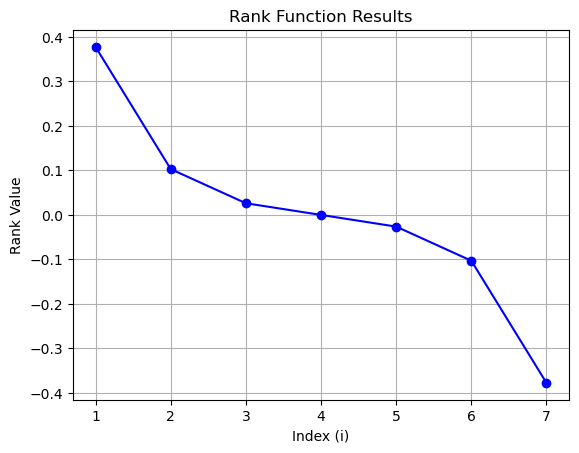

In [46]:
#Non Exception Ranking

import numpy as np
import matplotlib.pyplot as plt

def lamb(alpha):
    return np.arccosh(1 / (1-alpha))

#non adjacent test cases
# i is not offset
def rank(alpha, n, i):
    num = np.sinh(( ((n+1)/2) - i) * lamb(alpha))
    denom = np.sinh(((n+1)/2) * lamb(alpha)) - np.sinh(((n-1)/2) * lamb(alpha))
    return num / denom

index = list(range(1,n+1))

results = {}
results_array = []

# Set variables dynamically
for i in range(1, n+1):
   results[f'r_{i}'] = rank(0.49, 7, i)
   print(results[f'r_{i}'])
   results_array.append(results[f'r_{i}'])

print(results_array)

plt.plot(index, results_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()




In [51]:
def K_row_prev(j,k,n,alpha_prime):
    arr_1 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = alpha_prime
        if k == (i+2):
            arr_1[i] = alpha_prime
    arr_2 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = alpha_prime
        if k == (i+1):
            arr_2[i] = alpha_prime
    
    return np.concatenate([arr_1, arr_2])

def rank_results_array(j, k, arr):
    return arr[k-1] - arr[j-1]

#verifying the graph above makes sense
def check_rank(results_array):
    for i in range (1, n):
        for j in range (1, n):
            print('i,j', i, j)
            if i != j and j != i+1 and j != i-1 and not(i == p  and j == q) and not (i == q  and j == p):
                rank_results = rank_results_array(i,j, results_array)
                func_results = K_row_prev(i,j,n,alpha_prime)@a
                print(rank_results, func_results)
                if math.isclose(rank_results,func_results)  == True:
                    continue
                else:
                    print(' error at i: ' f'{i}', 'j:' f'{j}' )
                    return False
            else: 
                continue
    return True

check_rank(results_array)

i,j 1 1
i,j 1 2
i,j 1 3
-0.35126877108837234 1.7273904875584098
 error at i: 1 j:3


False

In [12]:
rank(alpha_prime, n, 7)

-0.3775245925034208

In [13]:
#Rank

def delta_ij(i,j):
    if i == j:
        return 1
    else:
        return 0

def rank_method2(j, b, c, alpha_prime):
    rank = alpha_prime * ( b_exist(b,n,j-1) - b_exist(b,n,j) + ( c[1] * ( delta_ij(j, q) - delta_ij(j, p) ) ) )
    return rank

print(b_exist(b,7,1))
print(delta_ij(1,4))
print(rank_method2(1,b,c,alpha_prime))
print(alpha_prime * (0 - b[1]))

print(b)

3.0917536365917813
0
-1.5149592819299729
-1.5149592819299729
{1: 3.0917536365917813, 2: 51.01675119592607, 3: 52.23538258078389, 4: 6.797387847690048, 5: 6.343887413301917, 6: 4.108504832517936}


-1.5149592819299729
-0.5767943546618032
-0.5971293785803329
-0.6418370301960132
0.22221521285018409
1.0953374645841505
2.013167367933789
[-1.5149592819299729, -0.5767943546618032, -0.5971293785803329, -0.6418370301960132, 0.22221521285018409, 1.0953374645841505, 2.013167367933789]


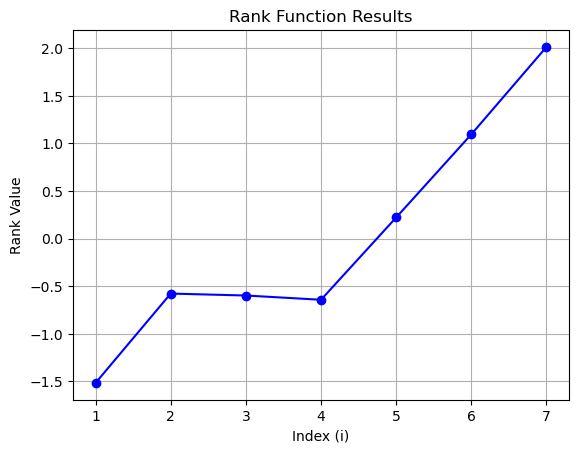

In [14]:
#Exception Ranking by formula

import numpy as np
import matplotlib.pyplot as plt

def lamb(alpha):
    return np.arccosh(1 / (1-alpha))

#non adjacent test cases
def rank(alpha, n, i):
    num = np.sinh(( ((n+1)/2) - i) * lamb(alpha))
    denom = np.sinh(((n+1)/2) * lamb(alpha)) - np.sinh(((n-1)/2) * lamb(alpha))
    return num / denom

index = list(range(1,n+1))

results = {}
results_array = []

# Set variables dynamically
for i in range(1, n+1):
   results[f'r_{i}'] = rank_method2(i, b, c, alpha_prime)
   print(results[f'r_{i}'])
   results_array.append(results[f'r_{i}'])

print(results_array)

plt.plot(index, results_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()


In [15]:
np.arccosh(1/(1-alpha)) == lamb(alpha)

True

In [16]:

#exception case
#def rank

def D_exp_matrix(i, j, n, alpha_prime):
    if i <= (j-1):
        num = -2 * np.cosh((i-0.5)*lamb(alpha_prime)) * np.cosh((n-(j-0.5))*lamb(alpha_prime)) * np.tanh(lamb(alpha_prime)/2)
        denom = np.sinh(lamb(alpha_prime) * n)
        return num/denom
    elif j <= (i-1):
        num = -2 * np.cosh((j-0.5)*lamb(alpha_prime)) * np.cosh((n-(i-0.5))*lamb(alpha_prime)) * np.tanh(lamb(alpha_prime)/2)
        denom = np.sinh(lamb(alpha_prime) * n)
        return num/denom
    elif i == j:
        return -2 * ( 1 - ( (np.cosh((i-0.5)*lamb(alpha_prime)) * 
                             np.cosh((n-(i-0.5))*lamb(alpha_prime)) * np.tanh(lamb(alpha_prime)/2) ) / np.sinh(lamb(alpha_prime) * n) ) )
        
def c_formula(p, q, n, alpha_prime):
    num = 1 + rank(alpha_prime,n,p) + rank(alpha_prime,n,q)
    denom = 1 - D_exp_matrix(q,q,n,alpha_prime) - D_exp_matrix(p,p,n,alpha_prime) + D_exp_matrix(q,p,n,alpha_prime) + D_exp_matrix(p,q,n,alpha_prime)
    return num/denom

def delta_ij(i,j):
    if i == j:
        return 1
    else:
        return 0

def rank_exp_j(j, p, q, n, alpha_prime, k_o, k_s):
    rank_norm = rank(alpha_prime,n,j)
    rank_add = c_formula(p,q,n,alpha_prime) * ( D_exp_matrix(j,q,n,alpha_prime) - D_exp_matrix(j,p,n,alpha_prime) + delta_ij(j,p) - delta_ij(j,q) )
    rank_exp = rank_norm + rank_add
    return rank_exp
    
def prediction_2(j,k,p,q,n,alpha_prime,k_o,k_s):
    return rank_exp_j(k,p,q,n,alpha_prime,k_o,k_s) - rank_exp_j(j,p,q,n,alpha_prime,k_o,k_s)


In [17]:
print(rank_method2(1, b, c, alpha_prime), rank_method2(3, b, c, alpha_prime))

-1.5149592819299729 -0.5971293785803329


-1.5149592819299729
-0.5767943546618032
-0.5971293785803329
-0.6418370301960132
0.22221521285018409
1.0953374645841505
2.013167367933789
[-1.5149592819299729, -0.5767943546618032, -0.5971293785803329, -0.6418370301960132, 0.22221521285018409, 1.0953374645841505, 2.013167367933789]


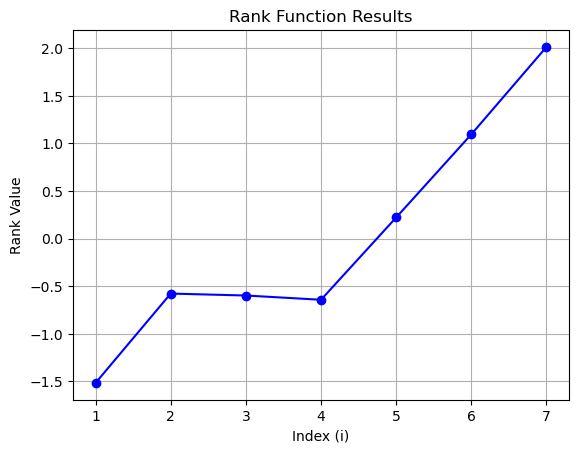

In [18]:
#Exception Ranking

import numpy as np
import matplotlib.pyplot as plt

def lamb(alpha):
    return np.arccosh(1 / (1-alpha))

#non adjacent test cases
def rank(alpha, n, i):
    num = np.sinh(( ((n+1)/2) - i) * lamb(alpha))
    denom = np.sinh(((n+1)/2) * lamb(alpha)) - np.sinh(((n-1)/2) * lamb(alpha))
    return num / denom

index = list(range(1,n+1))

results = {}
results_array = []

# Set variables dynamically
for i in range(1, n+1):
   results[f'r_{i}'] = rank_method2(i, b, c, alpha_prime)
   print(results[f'r_{i}'])
   results_array.append(results[f'r_{i}'])

print(results_array)

plt.plot(index, results_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()


In [19]:
rank_method2(1, b, c, alpha_prime)



-1.5149592819299729

In [20]:
rank_exp_j(1, p, q, n, alpha_prime, k_o, k_s)

0.32355830481071807

In [21]:
rank_method2(5, b, c, alpha_prime) - rank_method2(1, b, c, alpha_prime) 

1.7371744947801568

0.32355830481071807
-0.593431960800371
0.025387883977168926
0.6997996425765592
0.01609859124369364
-0.09113080646858973
-0.37347430288522204
[0.32355830481071807, -0.593431960800371, 0.025387883977168926, 0.6997996425765592, 0.01609859124369364, -0.09113080646858973, -0.37347430288522204]


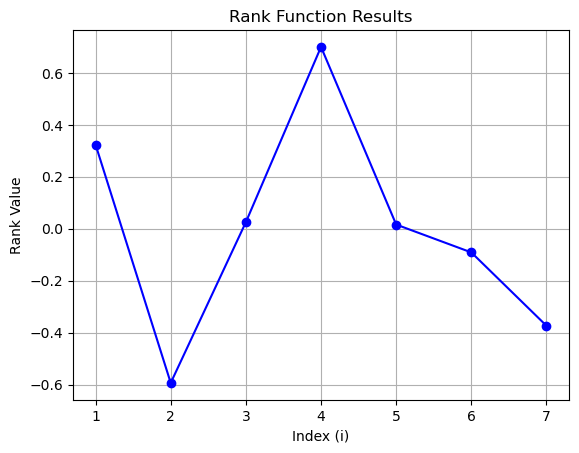

In [22]:
#Exception Ranking

import numpy as np
import matplotlib.pyplot as plt

def lamb(alpha):
    return np.arccosh(1 / (1-alpha))

#non adjacent test cases
def rank(alpha, n, i):
    num = np.sinh(( ((n+1)/2) - i) * lamb(alpha))
    denom = np.sinh(((n+1)/2) * lamb(alpha)) - np.sinh(((n-1)/2) * lamb(alpha))
    return num / denom

index = list(range(1,n+1))

results = {}
results_array = []

# Set variables dynamically
for i in range(1, n+1):
   results[f'r_{i}'] = rank_exp_j(i, p, q, n, alpha_prime, k_o, k_s)
   print(results[f'r_{i}'])
   results_array.append(results[f'r_{i}'])

print(results_array)

plt.plot(index, results_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()


0.3775245925034208
0.10296400554920966
0.02625582141504847
0.0
-0.02625582141504847
-0.10296400554920966
-0.3775245925034208
[0.3775245925034208, 0.10296400554920966, 0.02625582141504847, 0.0, -0.02625582141504847, -0.10296400554920966, -0.3775245925034208]


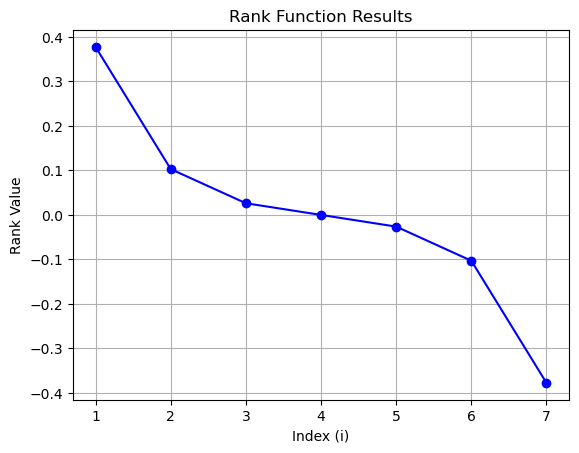

In [23]:
#Exception Ranking

import numpy as np
import matplotlib.pyplot as plt

def lamb(alpha):
    return np.arccosh(1 / (1-alpha))

#non adjacent test cases
def rank(alpha, n, i):
    num = np.sinh(( ((n+1)/2) - i) * lamb(alpha))
    denom = np.sinh(((n+1)/2) * lamb(alpha)) - np.sinh(((n-1)/2) * lamb(alpha))
    return num / denom

index = list(range(1,n+1))

results = {}
results_array = []

# Set variables dynamically
for i in range(1, n+1):
   results[f'r_{i}'] = rank(alpha_prime, n, i)
   print(results[f'r_{i}'])
   results_array.append(results[f'r_{i}'])

print(results_array)

plt.plot(index, results_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()


In [24]:
def K_row(j,k,p,q,n,alpha_prime):
    arr_1 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = alpha_prime
        if k == (i+2):
            arr_1[i] = alpha_prime
    arr_2 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = alpha_prime
        if k == (i+1):
            arr_2[i] = alpha_prime
    arr_3 = np.zeros(2)
    if j == p and k == q:
        arr_3[0] = 1
    elif j == q and k == p:
        arr_3[1] = 1 
    elif j == p or k == q:
        arr_3[0] = alpha_prime
    elif j == q or k == p:
        arr_3[1] = alpha_prime
    
    return np.concatenate([arr_1, arr_2, arr_3])

print(K_row(1,2,4,2,7,alpha_prime))

[1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.49 0.  ]


In [25]:
for i in range (1, n):
    print(K_row(i, i+1, 4, 2, 7, alpha_prime))
for i in range (1, n):
    print(K_row(i+1, i, 4, 2, 7, alpha_prime))
print(K_row(p, q, 4, 2, 7, alpha_prime))
print(K_row(q, p, 4, 2, 7, alpha_prime))

print(K_exp)

[1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.49 0.  ]
[0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   0.49]
[0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.49]
[0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.49 0.  ]
[0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.  ]
[0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.   0.  ]
[0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.49]
[0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.  ]
[0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.49 0.  ]
[0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.49]
[0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.  ]
[0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
[0.49 0.   0.   0.49 0.   0.   0.   0.49 0.49 0.   0.   0.   1.   0.  ]
[0.   0.49 0.49 0.   0.   0.   0.49 0.   0.   0.49 0.   0.   0. 

In [26]:
j = 2
k = 5
print(delta_ij(j, q))
print(rank_method2(k, b, c, alpha_prime) - rank_method2(j, b, c, alpha_prime))
print(K_row(j,k,p,q,n,alpha_prime) @ a_exp)
print(K_row(j,k,p,q,n,alpha_prime))

1
0.7990095675119873
0.7990095675119955
[0.   0.49 0.   0.49 0.   0.   0.49 0.   0.   0.   0.49 0.   0.   0.49]


In [27]:
print(K_row(2,5,4,2,7,alpha_prime))
print(K_row(1,4,4,2,7,alpha_prime)@a_exp)
print(rank_method2(4, b, c, alpha_prime) - rank_method2(1, b, c, alpha_prime))
print(a_exp)
print(b)
print(c)

[0.   0.49 0.   0.49 0.   0.   0.49 0.   0.   0.   0.49 0.   0.   0.49]
0.8731222517339567
0.8731222517339596
[  3.09175364  51.0167512   52.23538258   6.79738785   6.34388741
   4.10850483  -3.09175364 -51.0167512  -52.23538258  -6.79738785
  -6.34388741  -4.10850483  46.74786622 -46.74786622]
{1: 3.0917536365917813, 2: 51.01675119592607, 3: 52.23538258078389, 4: 6.797387847690048, 5: 6.343887413301917, 6: 4.108504832517936}
{1: 46.74786622328979}


In [28]:
print(K_row(2,5,4,2,7,alpha_prime))
y_13 = K_row(1,3,n,2,7,alpha_prime) @ a_exp
print(y_13)
rank_method2(3, b, c, alpha_prime) - rank_method2(1, b, c, alpha_prime)

for i in range(1,n+1):
    for j in range(1,n+1):
        if i == j or i == j+1 or j == i+1:
            continue
        print ('\n',i,j,':')
        print(K_row(i,j,4,2,7,alpha_prime) @ a_exp)
        print(rank_method2(j, b, c, alpha_prime) - rank_method2(i, b, c, alpha_prime))

# for i in range(1,n+1):
#     for j in range(1,n+1):
#         if i == j+1 or j == i+1:
            
#             print(K_row(i,j,n,2,7,alpha_prime) @ a_exp)
#         else:
#             continue
        
for i in range(1, len(K_exp)):
    print (i,j,'\n')
    print(K_exp[:,i] @ a_exp)

print(K_exp@a_exp)
    

[0.   0.49 0.   0.49 0.   0.   0.49 0.   0.   0.   0.49 0.   0.   0.49]
0.9178299033496415

 1 3 :
0.9178299033496415
0.91782990334964

 1 4 :
0.8731222517339567
0.8731222517339596

 1 5 :
1.7371744947801595
1.7371744947801568

 1 6 :
2.6102967465141216
2.6102967465141234

 1 7 :
3.528126649863762
3.528126649863762

 2 4 :
-1.0
-0.06504267553421006

 2 5 :
0.7990095675119955
0.7990095675119873

 2 6 :
1.6721318192459576
1.6721318192459536

 2 7 :
2.589961722595598
2.589961722595592

 3 1 :
-0.9178299033496451
-0.91782990334964

 3 5 :
0.8193445914305144
0.819344591430517

 3 6 :
1.6924668431644765
1.6924668431644834

 3 7 :
2.610296746514116
2.6102967465141216

 4 1 :
-0.8731222517339567
-0.8731222517339596

 4 2 :
1.0000000000000036
0.06504267553421006

 4 6 :
1.7371744947801642
1.7371744947801637

 4 7 :
2.655004398129804
2.655004398129802

 5 1 :
-1.7371744947801595
-1.7371744947801568

 5 2 :
-0.7990095675119946
-0.7990095675119873

 5 3 :
-0.819344591430518
-0.819344591430517

 5 

In [29]:
for i in range (0, n):
    print(K_exp[:,i], K_row(i+1,i+2,4,2,7,alpha_prime) )

[1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.49 0.  ] [1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.49 0.  ]
[0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   0.49] [0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   0.49]
[0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.49] [0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.49]
[0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.49 0.  ] [0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.49 0.  ]
[0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.  ] [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.  ]
[0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.   0.  ] [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.   0.  ]
[0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.49] [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.49 0. 

In [30]:
print(K)

[[1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.  ]
 [0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.   0.   1.  ]]


In [31]:
#Set Parameters
n = 7
k_o = 0.49
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s
p = 4
q = 2

K = k_create(n,alpha_prime)
print('K', '\n', K)
K_exp = k_create_excep(n, p, q, alpha_prime)
print('K_exp', '\n',K_exp)

K 
 [[1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.  ]
 [0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.   0.   1.  ]]
K_exp 
 [[1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.49 0.  ]
 [0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   0.49]
 [0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.49]
 [0.   0.   

In [32]:
print(K_row(4,2,2,4,4,k_o)) 

[0.49 0.   0.   0.   0.49 0.49 0.   1.  ]


In [33]:


print(K_row(1,2,4,2,4,k_o)) 
print(K_row(2,3,4,2,4,k_o))
print(K_row(3,4,4,2,4,k_o)) 
print(K_row(2,1,4,2,4,k_o))
print(K_row(3,2,4,2,4,k_o)) 
print(K_row(4,3,4,2,4,k_o))
print(K_row(4,2,4,2,4,k_o)) 
print(K_row(2,4,4,2,4,k_o))

Arr = np.concatenate([
    K_row(1,2,4,2,4,k_o).reshape(1, -1),
    K_row(2,3,4,2,4,k_o).reshape(1, -1),
    K_row(3,4,4,2,4,k_o).reshape(1, -1),
    K_row(2,1,4,2,4,k_o).reshape(1, -1),
    K_row(3,2,4,2,4,k_o).reshape(1, -1),
    K_row(4,3,4,2,4,k_o).reshape(1, -1),
    K_row(4,2,4,2,4,k_o).reshape(1, -1),
    K_row(2,4,4,2,4,k_o).reshape(1, -1)
], axis=0)
print(Arr)

print(K_exp)

print(Arr == K_exp)

[1.   0.   0.   0.   0.49 0.   0.49 0.  ]
[0.   1.   0.   0.49 0.   0.49 0.   0.49]
[0.   0.   1.   0.   0.49 0.   0.   0.49]
[0.   0.49 0.   1.   0.   0.   0.   0.49]
[0.49 0.   0.49 0.   1.   0.   0.49 0.  ]
[0.   0.49 0.   0.   0.   1.   0.49 0.  ]
[0.49 0.   0.   0.   0.49 0.49 1.   0.  ]
[0.   0.49 0.49 0.49 0.   0.   0.   1.  ]
[[1.   0.   0.   0.   0.49 0.   0.49 0.  ]
 [0.   1.   0.   0.49 0.   0.49 0.   0.49]
 [0.   0.   1.   0.   0.49 0.   0.   0.49]
 [0.   0.49 0.   1.   0.   0.   0.   0.49]
 [0.49 0.   0.49 0.   1.   0.   0.49 0.  ]
 [0.   0.49 0.   0.   0.   1.   0.49 0.  ]
 [0.49 0.   0.   0.   0.49 0.49 1.   0.  ]
 [0.   0.49 0.49 0.49 0.   0.   0.   1.  ]]
[[1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.49 0.  ]
 [0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   0.49]
 [0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.49]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.49 0.  ]
 [0.   0.   0.   0.   1.   

C:\Users\lukel\AppData\Local\Temp\ipykernel_67868\2365488457.py:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(Arr == K_exp)


In [34]:
print(rank_exp_j(1,p,q,n,alpha_prime,k_o,k_s))
rank_method2(1, b, c, alpha_prime)

0.32355830481071807


-1.5149592819299729

In [35]:
len(A)

6

In [36]:
B = (A-(np.identity(len(A)) * alpha_prime))

In [37]:
np.linalg.inv(B)

array([[-6.18317614, -2.02975631,  5.18859555,  4.57216813, -2.94823317,
        -6.01680238],
       [-2.02975631, -0.99458059,  2.54241182,  2.24036238, -1.44463425,
        -2.94823317],
       [ 5.18859555,  2.54241182, -3.94281376, -3.47439056,  2.24036238,
         4.57216813],
       [ 4.57216813,  2.24036238, -3.47439056, -3.94281376,  2.54241182,
         5.18859555],
       [-2.94823317, -1.44463425,  2.24036238,  2.54241182, -0.99458059,
        -2.02975631],
       [-6.01680238, -2.94823317,  4.57216813,  5.18859555, -2.02975631,
        -6.18317614]])

In [38]:
B

array([[-0.49,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  , -0.49,  1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , -0.49,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  , -0.49,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  , -0.49,  1.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.49]])

In [39]:
n

7

In [40]:
#def rank(alpha, n, i):
b_til = B @ np.ones(n-1)

def create_b_til_d(n):
    A = tridiag(n)
    B = (A-(np.identity(len(A)) * alpha_prime))
    b_til = B @ np.ones(n-1)
    num_coeff = n-1
    b_til_dictionary = {i: b_til[i-1] for i in range(1, num_coeff + 1)}
    return b_til_dictionary

def verif_array(arr1, arr2):
    for i in range(0, len(arr1)):
        print(arr1[i], arr2[i])
        if math.isclose(arr1[i], arr2[i], abs_tol = 1e-04):
            continue
        else: 
            return 
    return True

def dict_to_array(dict_arr):
    arr = np.zeros(len(dict_arr))
    for i in range(1, len(dict_arr) + 1):
       arr[i-1] = dict_arr[i]  
    return arr

def rank_til(j, n, alpha_prime, b_til_d):
    b_til_d = create_b_til_d(n)
    if j < 2 or j > n:
        if j == 1:
            return alpha_prime * (b_til_d[j])
        else:
            return 0 
    return alpha_prime * (b_til_d[j-1] - b_til_d[j])

In [41]:
A = tridiag(n)
print(A)
B = (A-(np.identity(len(A)) * alpha_prime))
print(B)

create_b_til_d(n)

[[0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]
[[-0.49  1.    0.    0.    0.    0.  ]
 [ 1.   -0.49  1.    0.    0.    0.  ]
 [ 0.    1.   -0.49  1.    0.    0.  ]
 [ 0.    0.    1.   -0.49  1.    0.  ]
 [ 0.    0.    0.    1.   -0.49  1.  ]
 [ 0.    0.    0.    0.    1.   -0.49]]


{1: 0.51, 2: 1.51, 3: 1.51, 4: 1.51, 5: 1.51, 6: 0.51}

In [42]:
b_til = B @ np.ones(n-1)
b_til_d = create_b_til_d(n)
print(b_til_d)
verif_array(b_til, dict_to_array(create_b_til_d(n)))

{1: 0.51, 2: 1.51, 3: 1.51, 4: 1.51, 5: 1.51, 6: 0.51}
0.51 0.51
1.51 1.51
1.51 1.51
1.51 1.51
1.51 1.51
0.51 0.51


True

In [43]:
(create_b_til_d(n))

{1: 0.51, 2: 1.51, 3: 1.51, 4: 1.51, 5: 1.51, 6: 0.51}

In [44]:
for i in range (1, n):
    rank_til_j = rank_til(i, n  , alpha_prime, create_b_til_d(n))
    print(f'rank{i}:',rank(alpha_prime, n, i))
    print(f'rank_til_{i}:', rank_til_j)
rank(alpha_prime, n, j)

rank1: 0.3775245925034208
rank_til_1: 0.2499
rank2: 0.10296400554920966
rank_til_2: -0.49
rank3: 0.02625582141504847
rank_til_3: 0.0
rank4: 0.0
rank_til_4: 0.0
rank5: -0.02625582141504847
rank_til_5: 0.0
rank6: -0.10296400554920966
rank_til_6: 0.49


-0.3775245925034208

In [45]:
rank(alpha_prime, n, 7)

-0.3775245925034208